## Introduction/Abstract
We will use the Metropolis algorithm to compute the first three moments of a distribution with probability density function proportional to
$$
f(x) := \begin{cases} \sin(x^2), & -\sqrt{\pi}\leq x \leq \sqrt{\pi}\\ 0, & \text{otherwise.}\end{cases}
$$
We note that the first and third moments should be 0 due to original symmetry. The second moment is a complete mystery!


## Packages and Setup

In [4]:
import matplotlib.pyplot as plt
plt.rcParams['agg.path.chunksize'] = 500000
import scipy.integrate as integrate
import numpy as np
from numpy.random import normal, uniform
from statsmodels.graphics.tsaplots import plot_acf

The us first define $f$  as we specified above.

In [5]:
def f(x): 
    
    if (x >= -np.sqrt(np.pi)) & (x <= np.sqrt(np.pi)): 
        
        out = np.sin(x**2)
        
    else:  
        
        out = 0
        
    return out

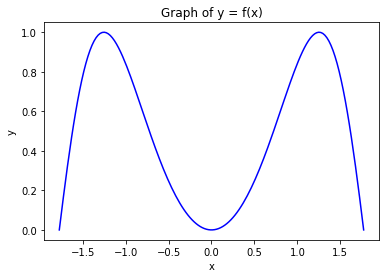

In [6]:
fig, ax = plt.subplots(1, 1) 

# Define the x-values
xvals = np.linspace(-np.sqrt(np.pi), np.sqrt(np.pi), 150)

# Vectorize f
f_vec = np.vectorize(f)

# Obtain y-values from vectorized f
yvals = f_vec(xvals)

ax.plot(xvals, yvals, c = 'blue')

plt.title('Graph of y = f(x)')

plt.xlabel('x')

plt.ylabel('y')

plt.show()

## Generate Data Using Metropolis Model

In [7]:
# Initalize values
sample = [1]

i = 0

n = 501000

while i < n:
    
    # Generate candidate number
    x = normal(loc = sample[i], scale = 2)
    
    # Generate uniform
    U = uniform(0, 1)
    
    # Compute alpha; simple because only Metropolis algorithm
    alpha = f(x)/f(sample[i])
    
    # Determine if x is accepted or rejected
    if U <= alpha:
        
        # Accept
        sample.append(x)
        
        # Increase i by 1
        i += 1
    
    else:
        
        # Continue to next iteration
        continue

The plot of the first 500 values of our sample is shown below. The algorithm quickly narrowed into a range appropriate for the distribution.

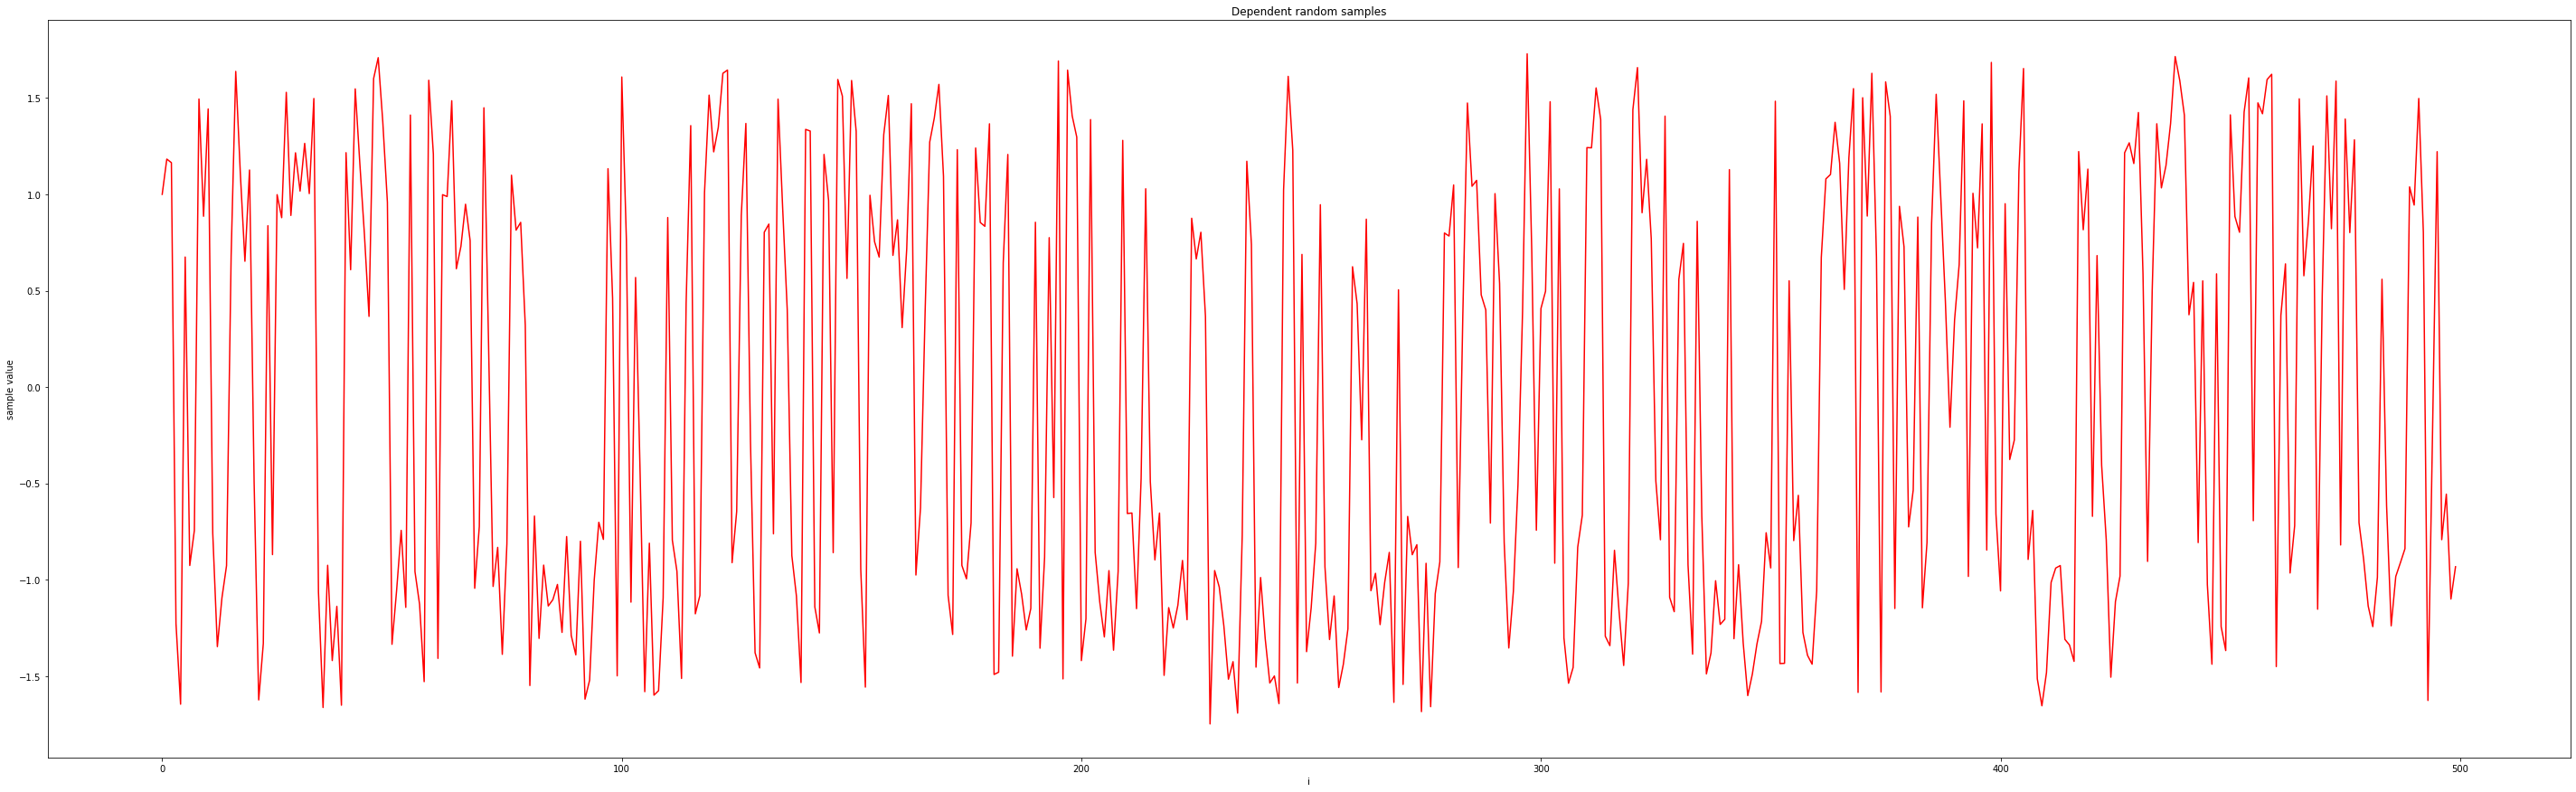

In [22]:
fig, ax = plt.subplots(figsize=(50, 15)) 

xvals = range(500)

yvals = sample[:500]

ax.plot(xvals, yvals, c = 'red')

plt.title('Dependent random samples')

plt.xlabel('i')

plt.ylabel('sample value')

plt.show()

As can be seen below, we have high autocorrelation for sample values up to about 3 steps apart.

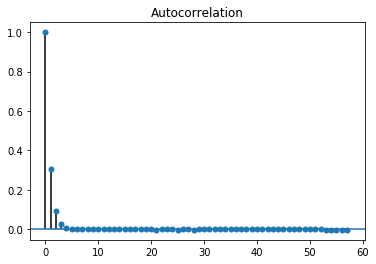

In [23]:
plot_acf(np.array(sample))

plt.show()

Let us also consider a histogram.

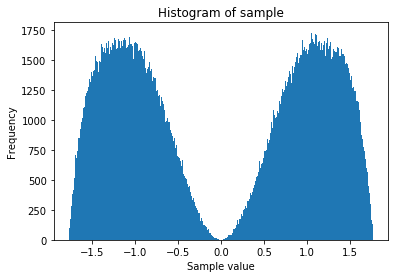

In [24]:
fig, ax = plt.subplots() 

ax.hist(sample, bins = 500)

plt.title('Histogram of sample')

plt.xlabel('Sample value')

plt.ylabel('Frequency')

plt.show()

We need to subset our values and then we will have constructed a random independent sample. We will be conservative and only consider every fifth value due to the autocorrelation. We did not see any need for subseting based on an intiale time peroid to explore the region, but we will omit the first 1000 values, regarless. This should leave 100,000 values for our analysis!

In [25]:
subset = np.array([sample[i] for i in range(1000, n, 5)])

Let us plot the subset, its autocorreplations, and a histogram to inspect the randomly generated numbers. Because a full plot of the subset would produce a confusing mess, we will only plot every one-hundredth value.

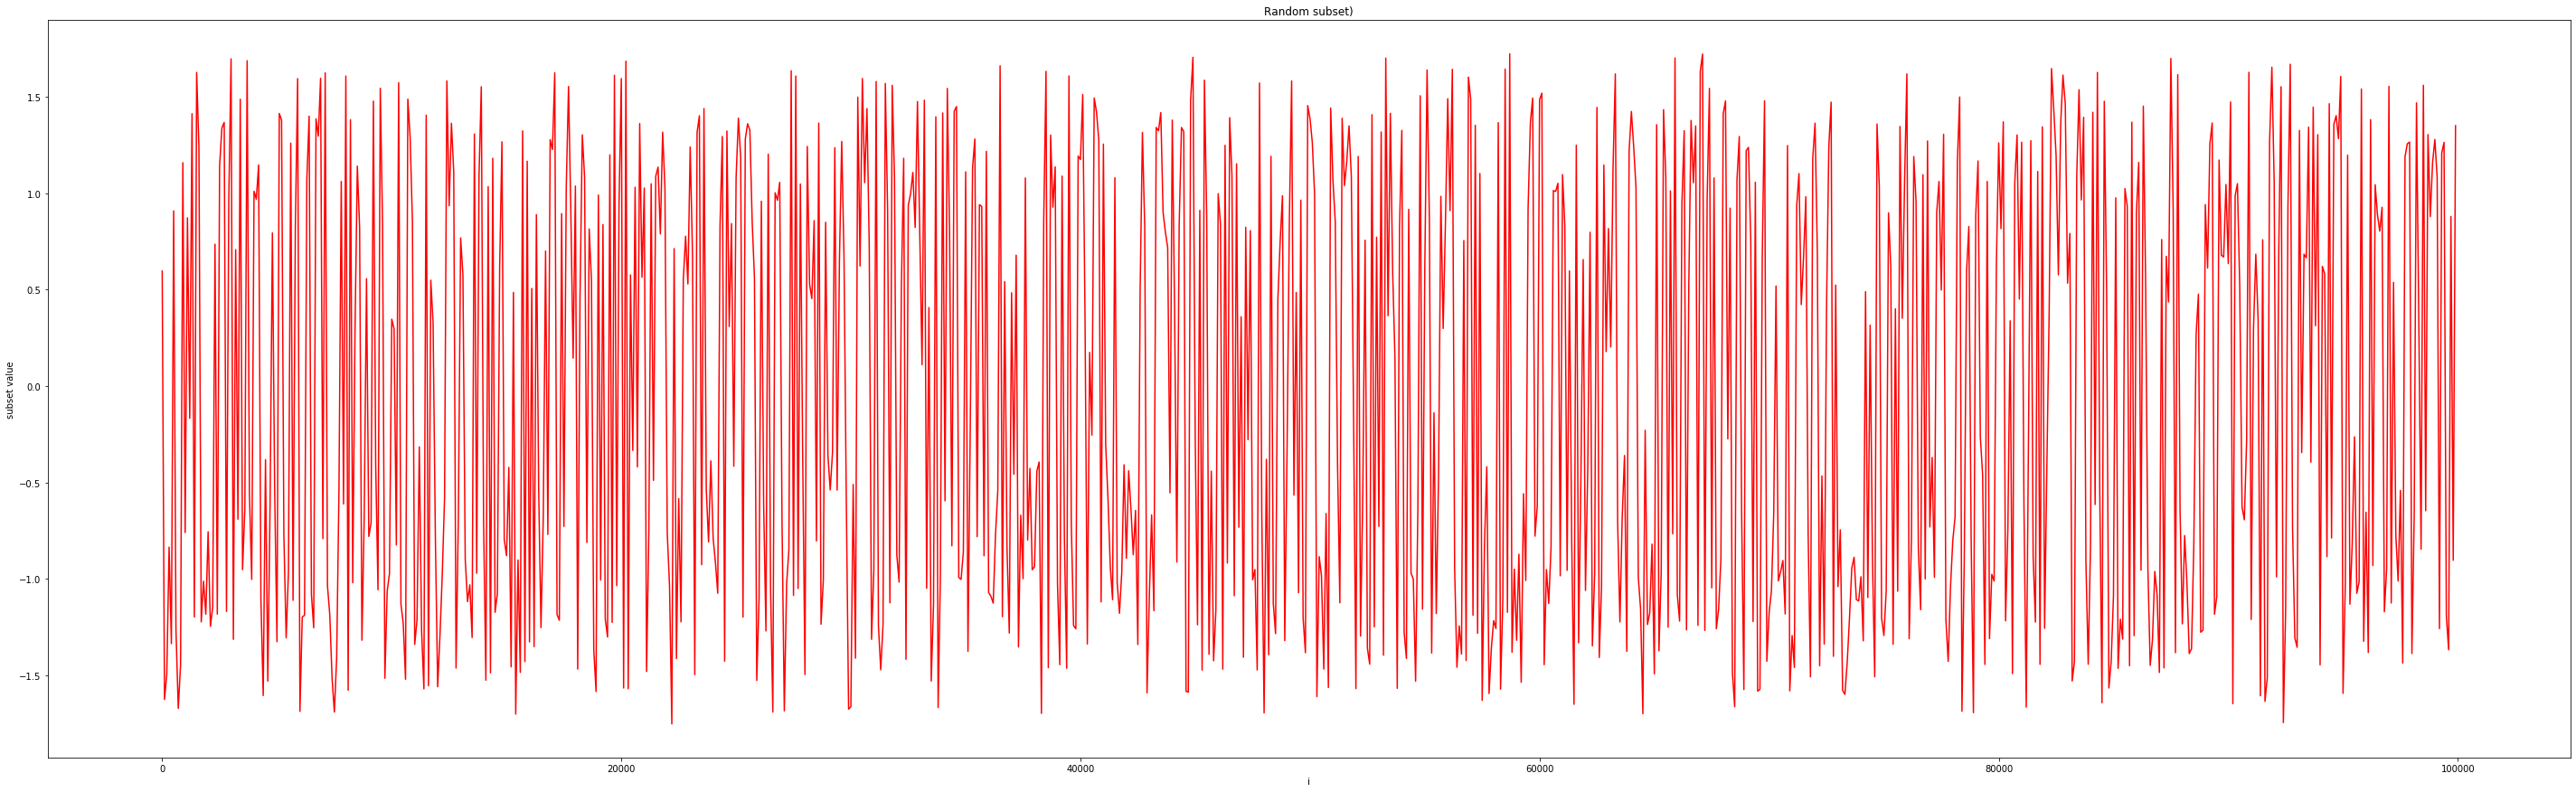

In [28]:
fig, ax = plt.subplots(figsize=(50, 15)) 

xvals = range(0, len(subset), 100)
yvals = subset[xvals]

ax.plot(xvals, yvals, c = 'red')

plt.title('Random subset)')

plt.xlabel('i')

plt.ylabel('subset value')

plt.show()

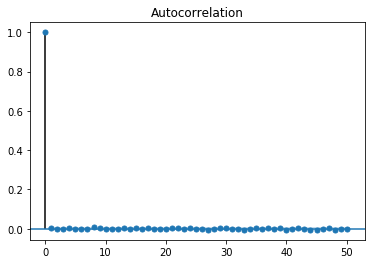

In [29]:
plot_acf(subset)

plt.show()

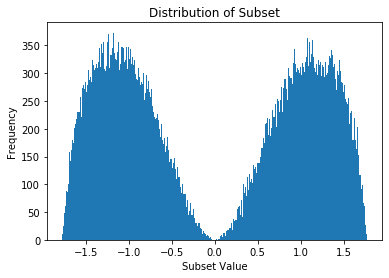

In [30]:
fig, ax = plt.subplots(1, 1) 

ax.hist(subset, bins = 500)

plt.title('Distribution of Subset')

plt.xlabel('Subset Value')

plt.ylabel('Frequency')

plt.show()

## Results
We are ready to compute the first three moments!

In [34]:
moment_1, moment_2, moment_3 = np.mean(subset), np.mean(subset**2), np.mean(subset**3)

results = [moment_1, moment_2, moment_3]

results

[-0.010440887846948976, 1.2706235215358441, -0.020144543739906755]

## Check
We will use numeric integration to check the three moments!

In [32]:
# Find the constant scalar
c = 1/integrate.quad(f, -np.sqrt(np.pi), np.sqrt(np.pi))[0]

moment_1 = integrate.quad(lambda x: c * x * f(x), -np.sqrt(np.pi), np.sqrt(np.pi))[0]

moment_2 = integrate.quad(lambda x: c * x**2 * f(x), -np.sqrt(np.pi), np.sqrt(np.pi))[0]

moment_3 = integrate.quad(lambda x: c * x**3 * f(x), -np.sqrt(np.pi), np.sqrt(np.pi))[0]

check = [moment_1, moment_2, moment_3]

check

[0.0, 1.3607708530689628, 0.0]